In [ ]:
import numpy as np
import pandas as pd

from torch import nn

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

# Loading the data

Fashion MNIST dataset

In [ ]:
batch_size = 64
train_loader = torch.utils.data.DataLoader(
    datasets.FashionMNIST('data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(
    datasets.FashionMNIST('data', train=False, transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=batch_size, shuffle=True)


# See the dataset

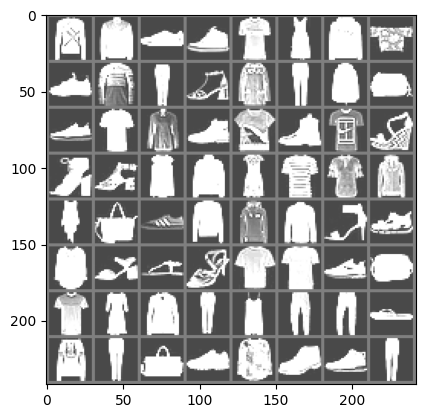

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
# print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

# Setting device

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')


# Defining models

In [ ]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(784, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 784)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = self.fc5(x)
        return x


class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)

        # Classifier
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Train MLP

In [ ]:
model = MLP()
model = model.to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

# Train the model

epochs = 10

train_accs , train_losses = [] , []
test_accs, test_losses = [], []

for epoch in range(epochs):
    correct_train = 0
    total_train = 0
    running_loss = 0.0
    correct_test = 0
    total_test = 0


    for batch_idx, (data, target) in enumerate(train_loader):
        data = data.to(device)
        target = target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        running_loss += loss.item()
        optimizer.step()
        _, predicted = torch.max(output.data, 1)
        total_train += target.size(0)
        correct_train += (predicted == target).sum().item()

    avg_train_loss = running_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    tr_acc = correct_train / total_train
    train_accs.append(tr_acc)

    running_loss = 0.0
    with torch.no_grad():
        for data, target in test_loader:
            data = data.to(device)
            target = target.to(device)
            output = model(data)
            test_loss = criterion(output, target)
            running_loss += test_loss.item()
            _, predicted = torch.max(output.data, 1)
            total_test += target.size(0)
            correct_test += (predicted == target).sum().item()

    avg_test_loss = running_loss / len(test_loader)
    test_losses.append(avg_test_loss)

    test_acc = correct_test / total_test
    test_accs.append(test_acc)




    print('Epoch: {} \tTraining Loss: {:.6f} \tTraining Accuracy: {:.6f} \tTest Loss: {:.6f} \tTest Accuracy: {:.6f}'.format(
        epoch+1, avg_train_loss , tr_acc, avg_test_loss, test_acc))


Epoch: 1 	Training Loss: 1.421247 	Training Accuracy: 0.472083 	Test Loss: 0.834316 	Test Accuracy: 0.681800
Epoch: 2 	Training Loss: 0.661626 	Training Accuracy: 0.759600 	Test Loss: 0.576977 	Test Accuracy: 0.796200
Epoch: 3 	Training Loss: 0.512156 	Training Accuracy: 0.816067 	Test Loss: 0.539646 	Test Accuracy: 0.801900
Epoch: 4 	Training Loss: 0.451825 	Training Accuracy: 0.837567 	Test Loss: 0.484677 	Test Accuracy: 0.820300
Epoch: 5 	Training Loss: 0.412413 	Training Accuracy: 0.852767 	Test Loss: 0.425698 	Test Accuracy: 0.848200
Epoch: 6 	Training Loss: 0.384725 	Training Accuracy: 0.861800 	Test Loss: 0.414162 	Test Accuracy: 0.851700
Epoch: 7 	Training Loss: 0.364277 	Training Accuracy: 0.866450 	Test Loss: 0.420247 	Test Accuracy: 0.846100
Epoch: 8 	Training Loss: 0.345940 	Training Accuracy: 0.875017 	Test Loss: 0.393354 	Test Accuracy: 0.858100
Epoch: 9 	Training Loss: 0.329941 	Training Accuracy: 0.879750 	Test Loss: 0.374404 	Test Accuracy: 0.864500
Epoch: 10 	Training

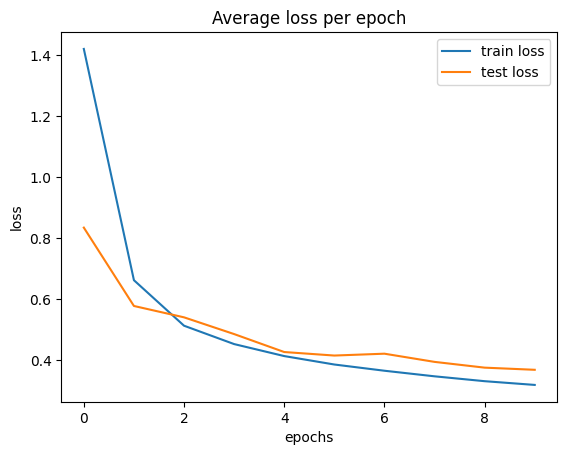

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.title('Average loss per epoch')
plt.show()

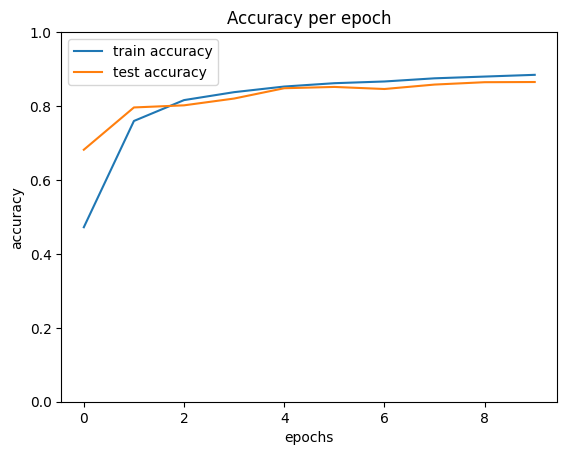

In [ ]:
plt.plot(train_accs, label='train accuracy')
plt.plot(test_accs, label='test accuracy')
plt.xlabel('epochs')
plt.ylim([0, 1])
plt.ylabel('accuracy')
plt.legend()
plt.title('Accuracy per epoch')
plt.show()

# Train CNN

In [ ]:
cnn = CNN()
cnn = cnn.to(device)
optimizer = optim.SGD(cnn.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

# Train the model

epochs = 10

train_accs , train_losses = [] , []
test_accs, test_losses = [], []

for epoch in range(epochs):
    correct_train = 0
    total_train = 0
    running_loss = 0.0
    correct_test = 0
    total_test = 0


    for batch_idx, (data, target) in enumerate(train_loader):
        data = data.to(device)
        target = target.to(device)
        optimizer.zero_grad()
        output = cnn(data)
        loss = criterion(output, target)
        loss.backward()
        running_loss += loss.item()
        optimizer.step()
        _, predicted = torch.max(output.data, 1)
        total_train += target.size(0)
        correct_train += (predicted == target).sum().item()

    avg_train_loss = running_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    tr_acc = correct_train / total_train
    train_accs.append(tr_acc)

    running_loss = 0.0
    with torch.no_grad():
        for data, target in test_loader:
            data = data.to(device)
            target = target.to(device)
            output = cnn(data)
            test_loss = criterion(output, target)
            running_loss += test_loss.item()
            _, predicted = torch.max(output.data, 1)
            total_test += target.size(0)
            correct_test += (predicted == target).sum().item()

    avg_test_loss = running_loss / len(test_loader)
    test_losses.append(avg_test_loss)

    test_acc = correct_test / total_test
    test_accs.append(test_acc)




    print('Epoch: {} \tTraining Loss: {:.6f} \tTraining Accuracy: {:.6f} \tTest Loss: {:.6f} \tTest Accuracy: {:.6f}'.format(
        epoch+1, avg_train_loss , tr_acc, avg_test_loss, test_acc))


Epoch: 1 	Training Loss: 0.794361 	Training Accuracy: 0.726050 	Test Loss: 0.543336 	Test Accuracy: 0.788900
Epoch: 2 	Training Loss: 0.465974 	Training Accuracy: 0.830483 	Test Loss: 0.428741 	Test Accuracy: 0.846500
Epoch: 3 	Training Loss: 0.403476 	Training Accuracy: 0.855550 	Test Loss: 0.410457 	Test Accuracy: 0.849600
Epoch: 4 	Training Loss: 0.366297 	Training Accuracy: 0.869250 	Test Loss: 0.423217 	Test Accuracy: 0.835400
Epoch: 5 	Training Loss: 0.341495 	Training Accuracy: 0.877317 	Test Loss: 0.353883 	Test Accuracy: 0.873300
Epoch: 6 	Training Loss: 0.322082 	Training Accuracy: 0.882483 	Test Loss: 0.366733 	Test Accuracy: 0.867500
Epoch: 7 	Training Loss: 0.306197 	Training Accuracy: 0.889483 	Test Loss: 0.387633 	Test Accuracy: 0.853600
Epoch: 8 	Training Loss: 0.292217 	Training Accuracy: 0.895000 	Test Loss: 0.308798 	Test Accuracy: 0.890400
Epoch: 9 	Training Loss: 0.279921 	Training Accuracy: 0.898217 	Test Loss: 0.375841 	Test Accuracy: 0.865600
Epoch: 10 	Training

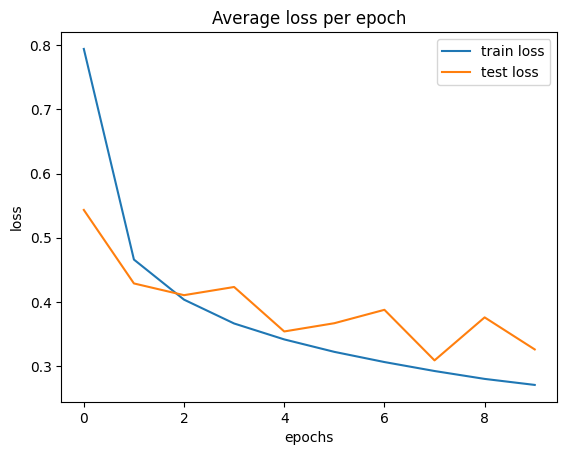

In [ ]:
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.title('Average loss per epoch')
plt.show()

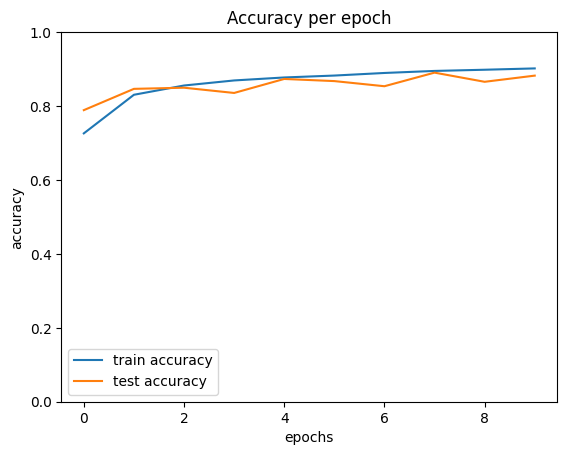

In [ ]:
plt.plot(train_accs, label='train accuracy')
plt.plot(test_accs, label='test accuracy')
plt.xlabel('epochs')
plt.ylim([0, 1])
plt.ylabel('accuracy')
plt.legend()
plt.title('Accuracy per epoch')
plt.show()